In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
bitcoin=pd.read_csv("/content/sample_data/BTC-EUR.csv",index_col='Date', parse_dates=True)

In [ ]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


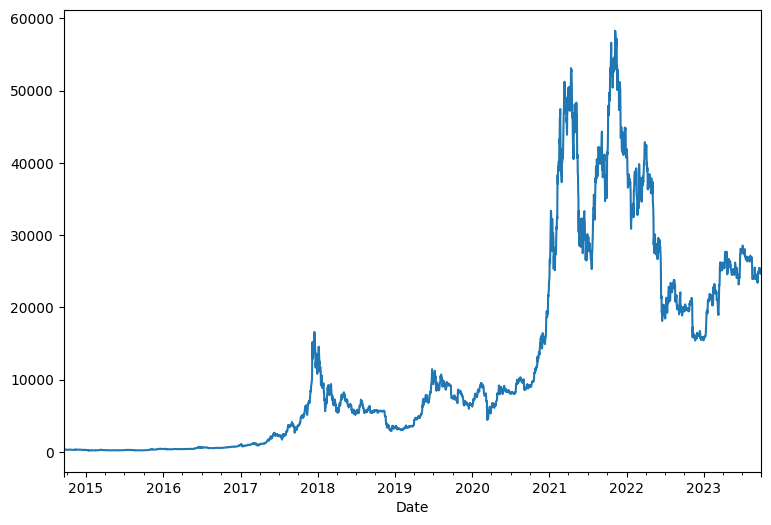

In [ ]:
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

<ipython-input-18-501f472999b2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].plot()


<Axes: xlabel='Date'>

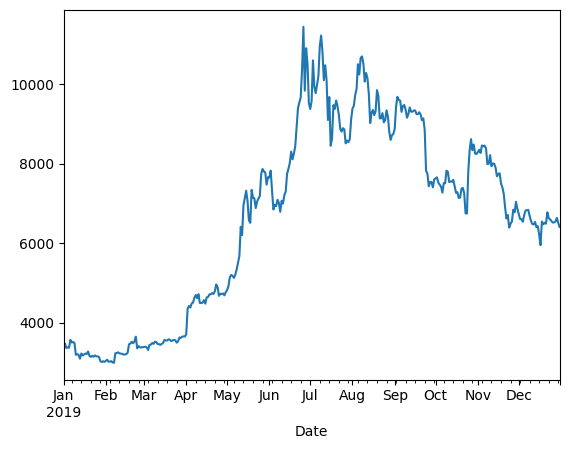

In [ ]:
bitcoin['2019']['Close'].plot()

<Axes: xlabel='Date'>

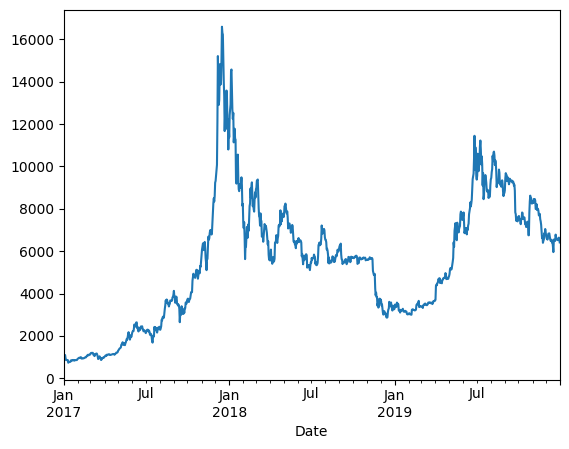

In [ ]:
bitcoin['2017':'2019']['Close'].plot()

<ipython-input-20-0d75a13bc8b7>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].resample('M').plot()


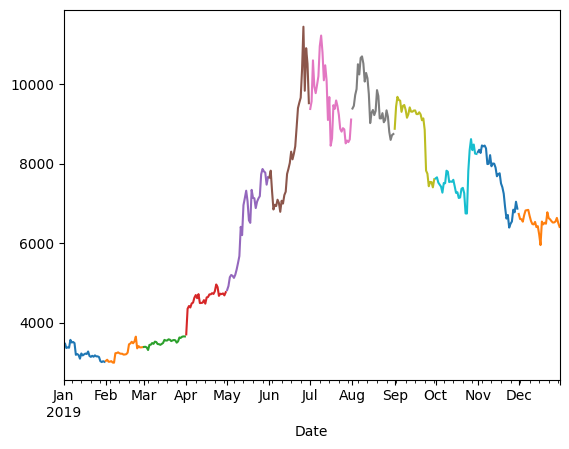

In [ ]:
 bitcoin['2019']['Close'].resample('M').plot()
 plt.show()

<ipython-input-21-08ae1c154b9c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].resample('M').mean().plot()


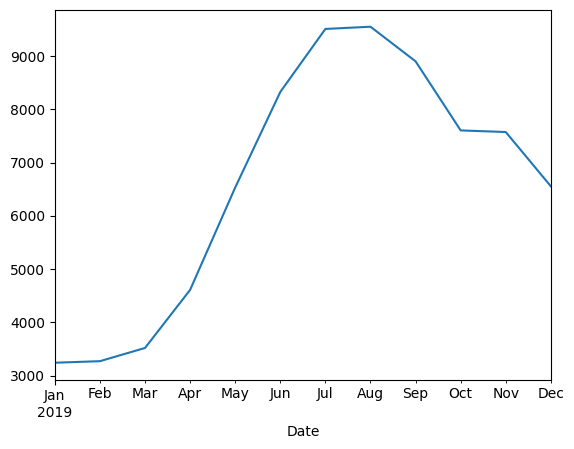

In [ ]:
 bitcoin['2019']['Close'].resample('M').mean().plot()
 plt.show()

<ipython-input-22-add30238e358>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].resample('M').std().plot()


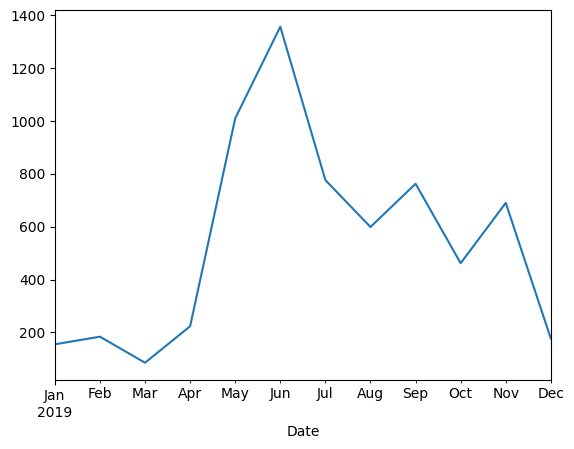

In [ ]:
 bitcoin['2019']['Close'].resample('M').std().plot()
 plt.show()

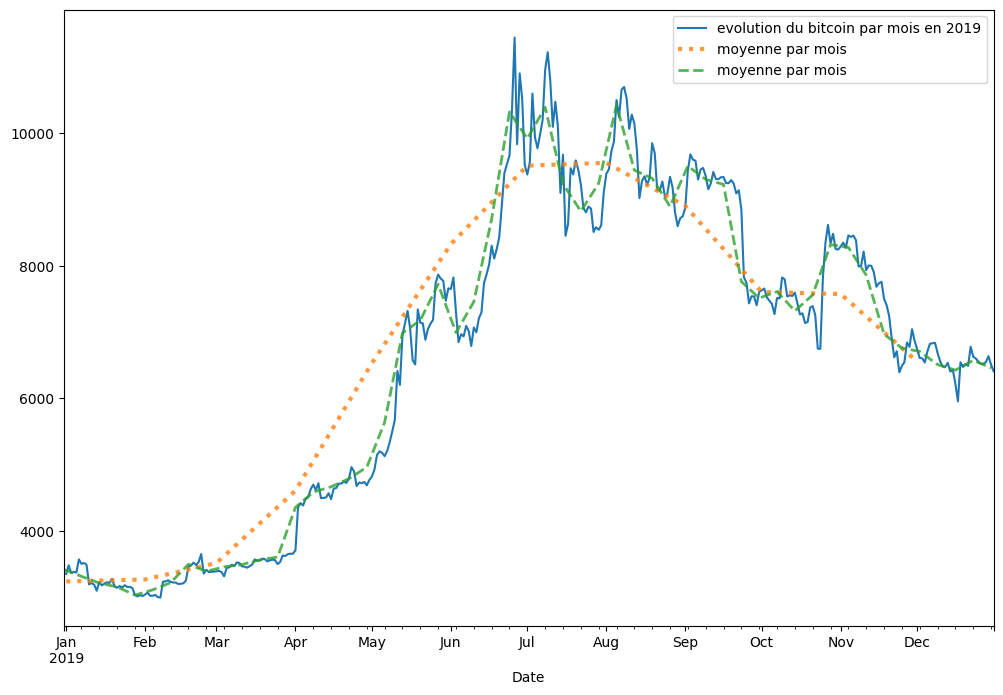

In [ ]:
 plt.figure(figsize=(12,8))
 bitcoin.loc['2019','Close'].plot(label="evolution du bitcoin par mois en 2019")
 bitcoin.loc['2019','Close'].resample('M').mean().plot(label="moyenne par mois", lw=3, ls=":", alpha=0.8)
 bitcoin.loc['2019','Close'].resample('W').mean().plot(label="moyenne par mois", lw=2, ls="--", alpha=0.8)
 plt.legend()
 plt.show()


In [ ]:
 m=bitcoin.loc['2019','Close'].resample('W').agg(['mean','std','min','max'])

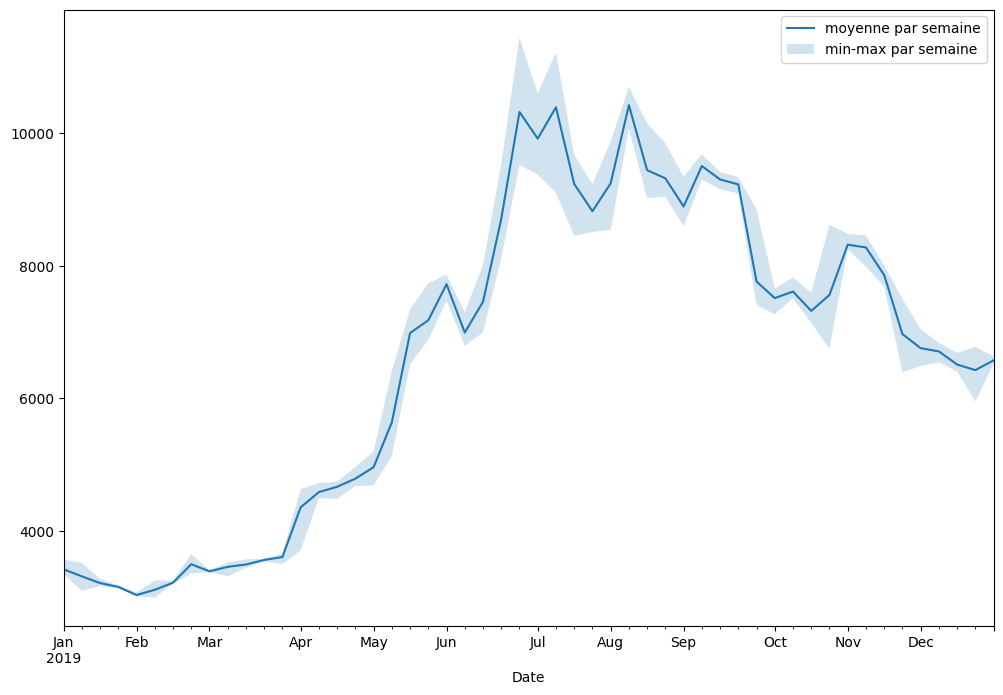

In [ ]:
plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['min'],m["max"], alpha=0.2, label="min-max par semaine")
plt.legend()
plt.show()

# Moving average:
une technique qui permet de calculer la moyenne d'une fenetre de valeurs. Par exemple, on peut definir une fenetre de 7 semaines dont on calculera la moyenne on se decale d'un jour et on recalcule la moyenne etc.

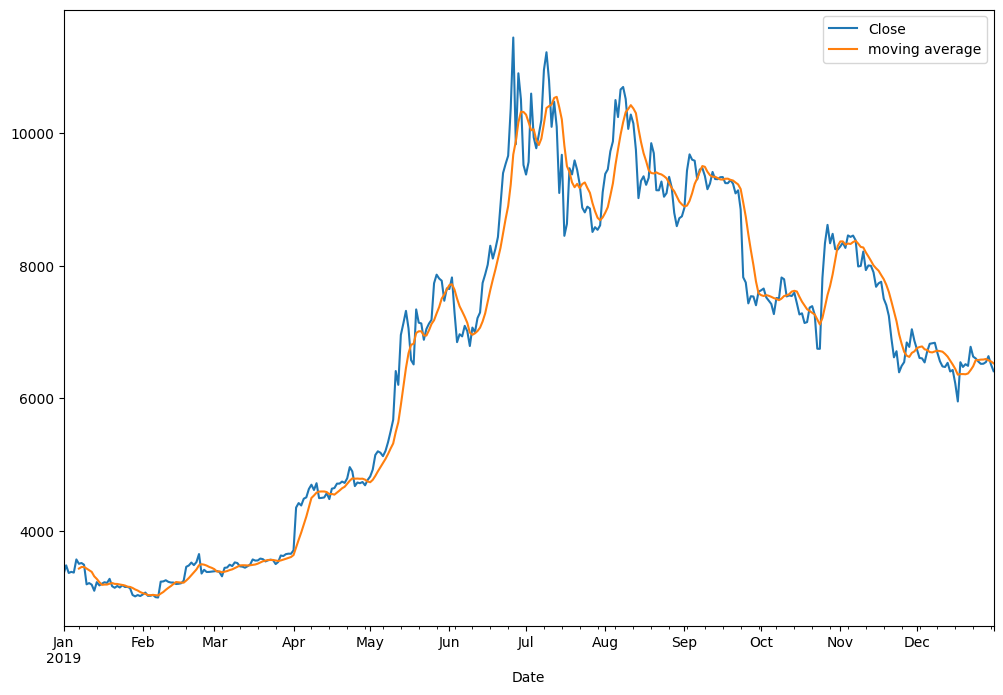

In [ ]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019','Close'].rolling(window=7).mean().plot(label='moving average')
plt.legend()
plt.show()

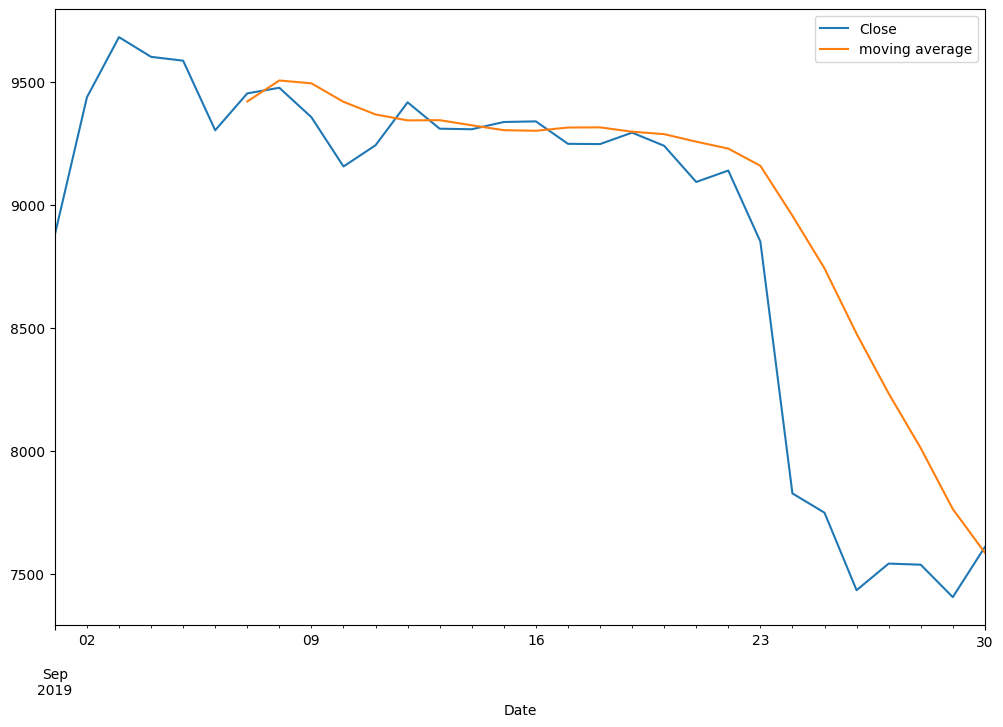

In [ ]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09','Close'].rolling(window=7).mean().plot(label='moving average')
plt.legend()
plt.show()

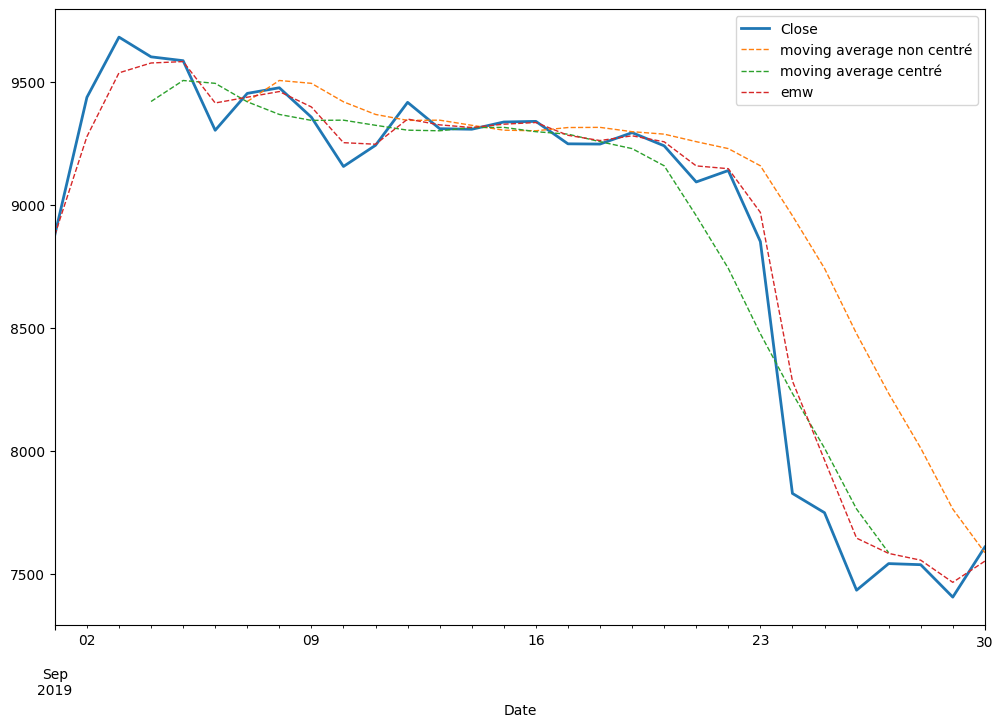

In [ ]:
plt.figure(figsize=(12,8))
bitcoin.loc['2019-09','Close'].plot(lw=2)
bitcoin.loc['2019-09','Close'].rolling(window=7).mean().plot(label='moving average non centré', lw=1, ls="--")
bitcoin.loc['2019-09','Close'].rolling(window=7,center=True).mean().plot(label='moving average centré', lw=1, ls="--")
bitcoin.loc['2019-09','Close'].ewm(alpha=0.6).mean().plot(label="emw", lw=1, ls="--")
plt.legend()
plt.show()

# Exp Weighted function ou encore la moyenne mobile exponentielle:


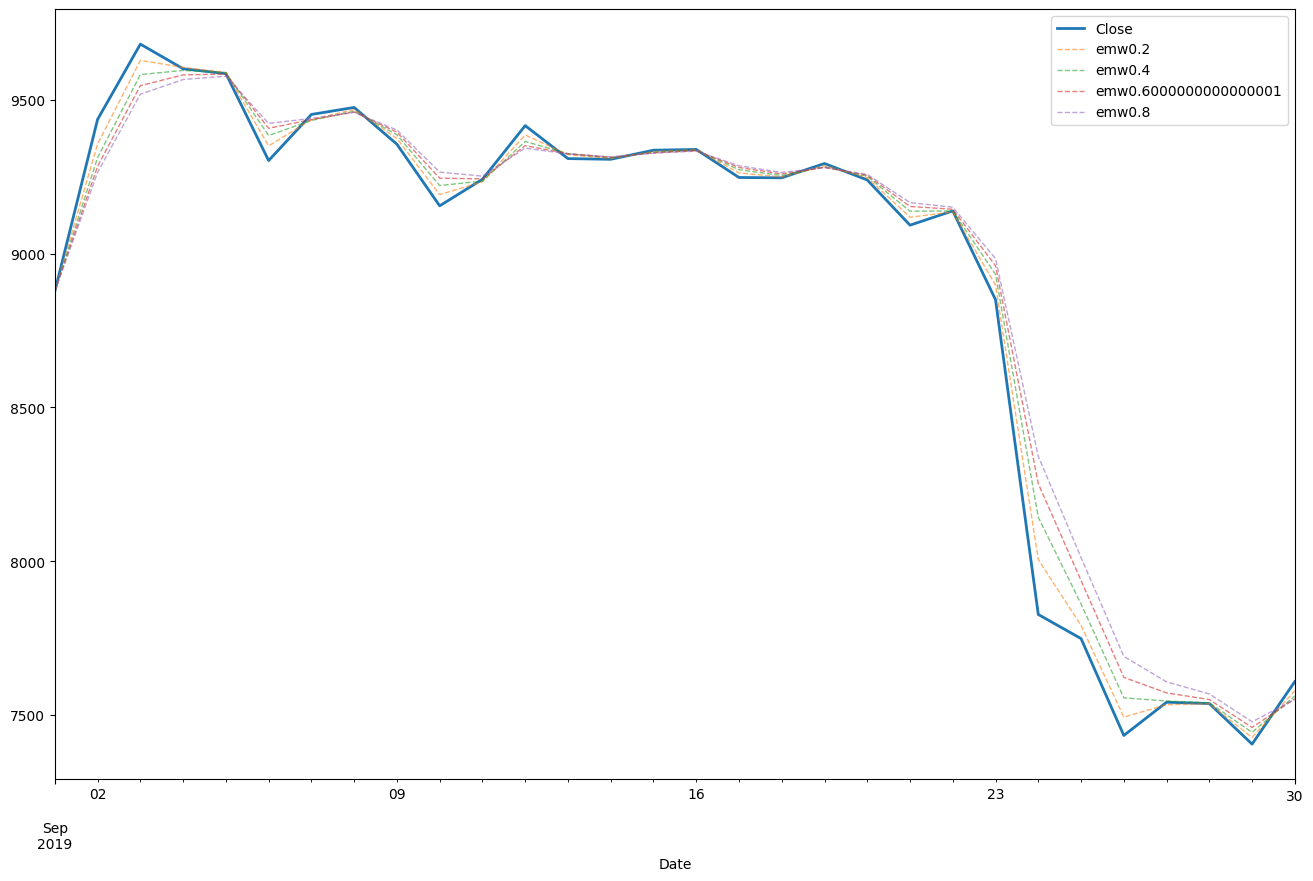

In [ ]:
plt.figure(figsize=(16,10))
bitcoin.loc['2019-09','Close'].plot(lw=2)
for i in np.arange(0.2,1, 0.2):
  bitcoin.loc['2019-09','Close'].ewm(i).mean().plot(label=f'emw{i}', lw=1, ls="--",alpha=0.6)
plt.legend()
plt.show()

In [ ]:
ethereum=pd.read_csv("/content/sample_data/ETH-EUR.csv",index_col='Date', parse_dates=True)

In [ ]:
ethereum.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-11,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,286.677399,289.079956,279.644714,282.937531,282.937531,613364441


<ipython-input-48-a1d58442158c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ethereum['2019']['Close'].plot()


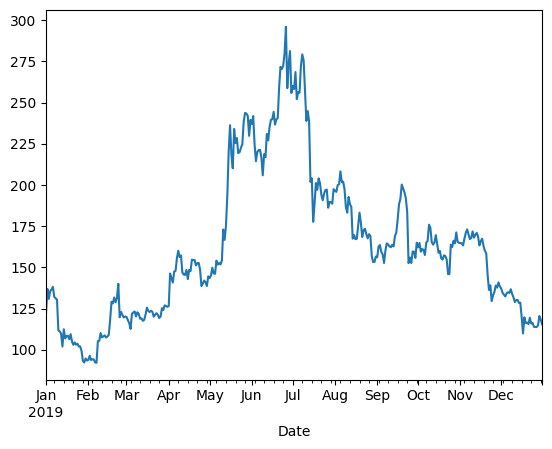

In [ ]:
ethereum['2019']['Close'].plot()
plt.show()

In [ ]:
data=pd.merge(bitcoin,ethereum, on='Date', how='outer', suffixes=(('_btc','_eth')))
data
# tous les indexes

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open _eth,High _eth,Low _eth,Close _eth,Adj Close _eth,Volume _eth
Date,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,24924.808594,25032.384766,24622.509766,24657.968750,24657.968750,7693979394,1494.610107,1499.360596,1480.656372,1484.590454,1484.590454,2.898513e+09
2023-09-26,24655.103516,24945.947266,24474.373047,24829.972656,24829.972656,11327874247,1484.490967,1506.342773,1472.382324,1499.630859,1499.630859,4.149518e+09
2023-09-27,24826.458984,24927.884766,24677.222656,24805.451172,24805.451172,9447779085,1499.347900,1507.605469,1494.558472,1507.611694,1507.611694,3.353970e+09


In [ ]:
data=pd.merge(bitcoin,ethereum, on='Date', how='inner', suffixes=(('_btc','_eth')))
data
# les indexes en commun uniquement

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,24924.808594,25032.384766,24622.509766,24657.968750,24657.968750,7693979394,1494.610107,1499.360596,1480.656372,1484.590454,1484.590454,2898513321
2023-09-26,24655.103516,24945.947266,24474.373047,24829.972656,24829.972656,11327874247,1484.490967,1506.342773,1472.382324,1499.630859,1499.630859,4149518038
2023-09-27,24826.458984,24927.884766,24677.222656,24805.451172,24805.451172,9447779085,1499.347900,1507.605469,1494.558472,1507.611694,1507.611694,3353970387


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

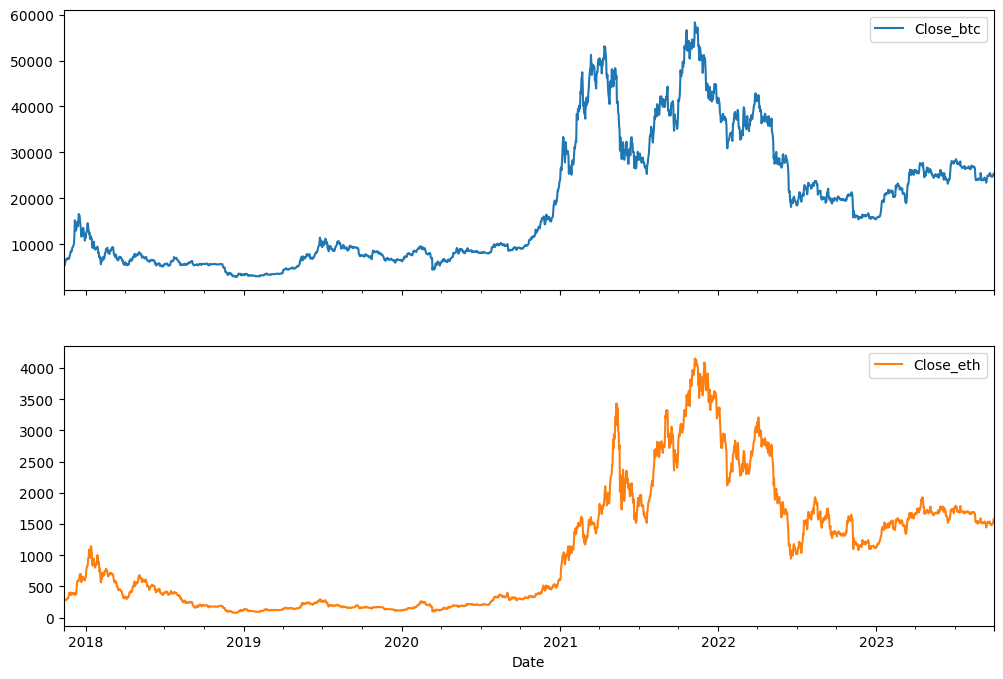

In [ ]:
data[['Close_btc', 'Close_eth']].plot(subplots=True,figsize=(12,8))

In [ ]:
cor=data[['Close_btc', 'Close_eth']].corr()
cor

,Close_btc,Close_eth
Close_btc,1.000000,0.929132
Close_eth,0.929132,1.000000


<Axes: >

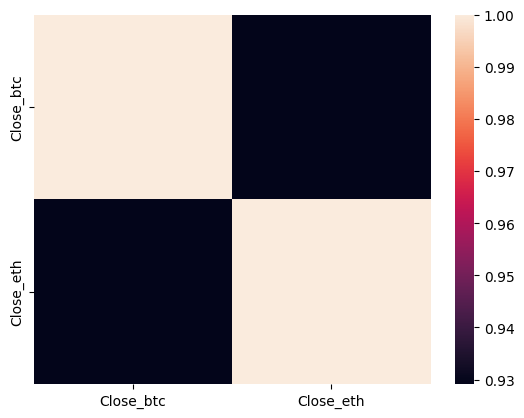

In [ ]:
import seaborn as sns
sns.heatmap(cor)

#Trading strategy: Turtle Startegy:
cette stratégie est utilisée afin de pouvoir savoir quand peut on acheter ou vendre des bitcoins.
Pour ce faire on va utliser rolling() pour calculer:

*   Le max sur les 28 derniers jours
*   Le min sur les 28 derniers jours
 De meme, on va utiliser "Boolean indexing"

*   Si 'Close' > max28  ==> on achete
*   Si 'Close' < min28  ==> on vend







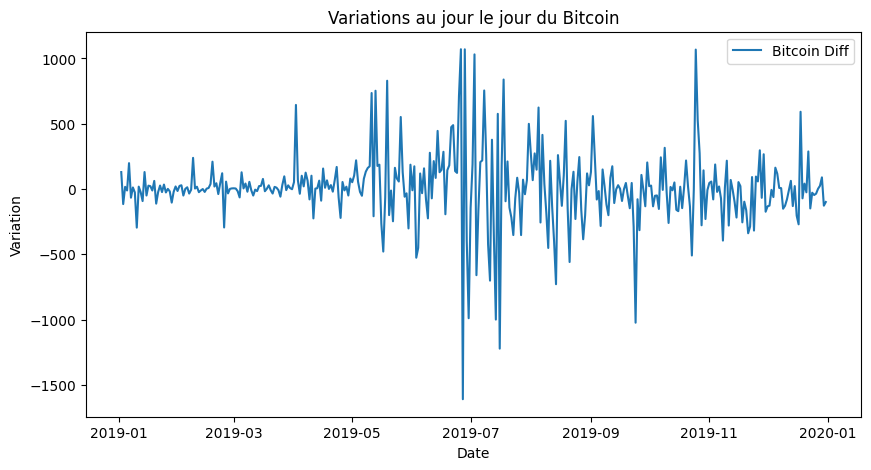

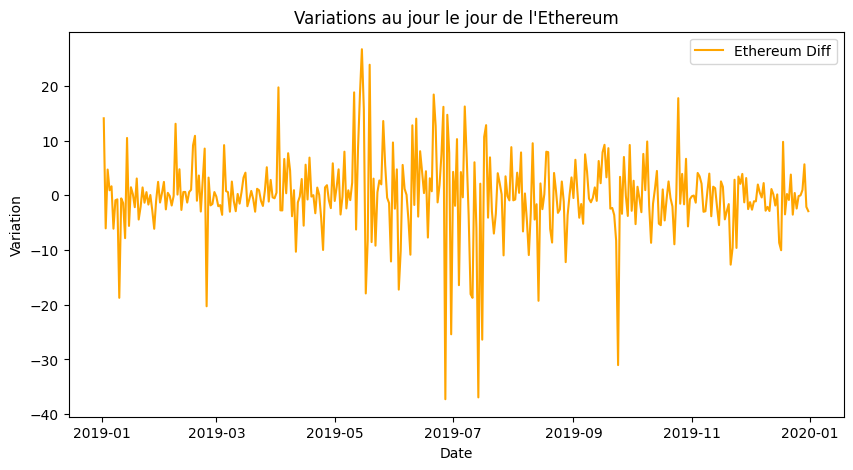

In [ ]:
# pour observer les variations au jour le jour du bitcoin et d'ethereum:

# Créez une figure pour le graphique du Bitcoin
plt.figure(figsize=(10, 5))
plt.plot(bitcoin['Close']['2019'].diff(), label='Bitcoin Diff')
plt.title('Variations au jour le jour du Bitcoin')
plt.xlabel('Date')
plt.ylabel('Variation')
plt.legend()


# Créez une autre figure pour le graphique de l'Ethereum
plt.figure(figsize=(10, 5))
plt.plot(ethereum['Close']['2019'].diff(), label='Ethereum Diff', color='orange')
plt.title('Variations au jour le jour de l\'Ethereum')
plt.xlabel('Date')
plt.ylabel('Variation')
plt.legend()


# Affichez les deux graphiques séparément
plt.show()


In [ ]:
df=bitcoin.copy()
df["buy"]=np.zeros(len(df))
df["sell"]=np.zeros(len(df))
df

,Open,High,Low,Close,Adj Close,Volume,buy,sell
Date,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,0.0,0.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,0.0,0.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,0.0,0.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,0.0,0.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-09-25,24924.808594,25032.384766,24622.509766,24657.968750,24657.968750,7693979394,0.0,0.0
2023-09-26,24655.103516,24945.947266,24474.373047,24829.972656,24829.972656,11327874247,0.0,0.0
2023-09-27,24826.458984,24927.884766,24677.222656,24805.451172,24805.451172,9447779085,0.0,0.0


In [ ]:
df.rollingMax=df.Close.shift(1).rolling(window=28).max()
df.rollingMin=df.Close.shift(1).rolling(window=28).min()
df.loc[df.rollingMax < df.Close, 'buy']=1
df.loc[df.rollingMin > df.Close, 'sell']=-1
df

,Open,High,Low,Close,Adj Close,Volume,buy,sell
Date,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,0.0,0.0
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,0.0,0.0
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,0.0,0.0
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,0.0,0.0
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-09-25,24924.808594,25032.384766,24622.509766,24657.968750,24657.968750,7693979394,0.0,0.0
2023-09-26,24655.103516,24945.947266,24474.373047,24829.972656,24829.972656,11327874247,0.0,0.0
2023-09-27,24826.458984,24927.884766,24677.222656,24805.451172,24805.451172,9447779085,0.0,0.0


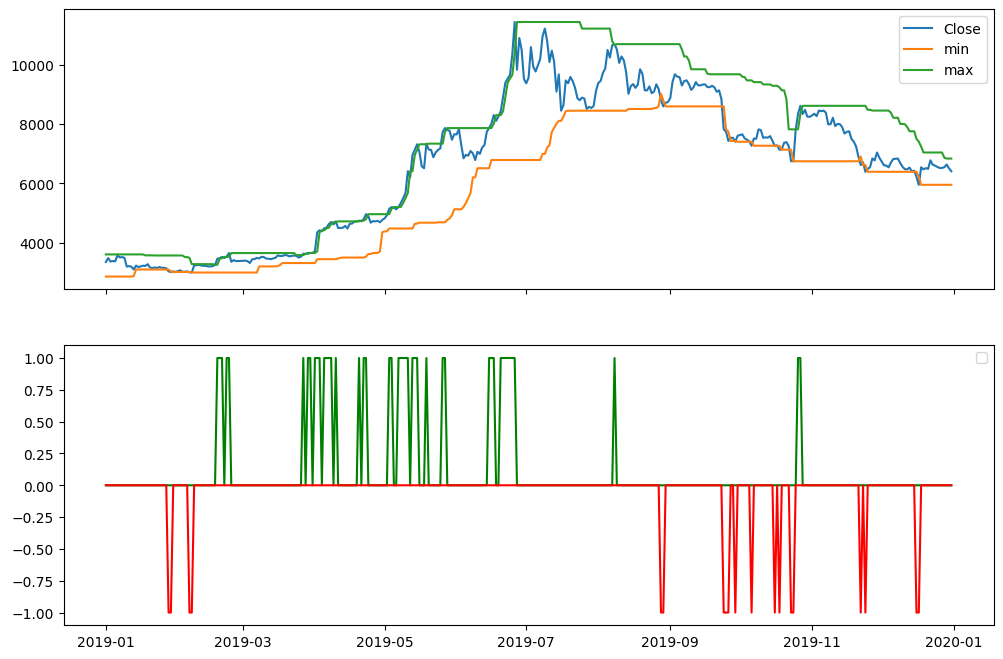

In [ ]:
start='2019'
end='2019'
fig,ax=plt.subplots(2,figsize=(12,8),sharex=True)
ax[0].plot(df.Close[start:end])
ax[0].plot(df.rollingMin[start:end])
ax[0].plot(df.rollingMax[start:end])
ax[0].legend(['Close','min','max'])
ax[1].plot(df.buy[start:end], c='g')
ax[1].plot(df.sell[start:end], c='r')
plt.legend()